## Youtube video :

https://www.youtube.com/watch?v=tJBVC2kzPCY

GOAL :

Given a distance matrix D between pairs of points from $\mathbb{R}^p$ (where $p$ can be unknown), find an embedding in $\mathbb{R}^d$ such that the distortion of distances is minimal.

This method belongs to non-linear dimensionality reductions algorithms.

## Let's create some data :

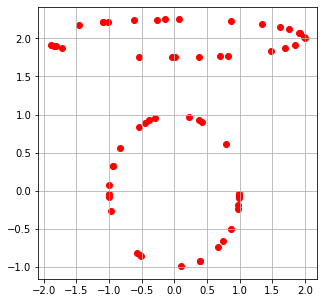

In [318]:
import numpy as np
import matplotlib.pyplot as plt

p = 2
n = 60
theta1 = np.random.uniform(0,2*3.14,n//2)
theta2 = np.random.uniform(0,2*3.14,n//2)
X1 = np.vstack(( np.cos(theta1),1*np.sin(theta1))).T
X2 = np.vstack(( 2*np.cos(theta2),2 + .25*np.sin(theta2))).T
X = np.vstack((X1,X2))
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X[:,0],X[:,1],c='r');

## Building the distance matrix (L2-norm)

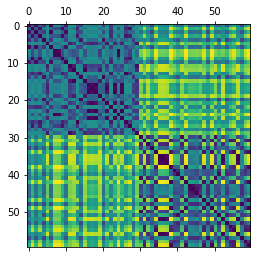

In [319]:
D = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        D[i,j] = np.linalg.norm(X[i]-X[j],ord=2)
        D[j,i] = D[i,j]
plt.matshow(D);

## Construction of the embedding

We are looking for $y_1,...,y_n \in \mathbb{R}^d$ such that $||y_i-y_j||_2$ is as close as possible to $D_{i,j}$.

If we set arbitrarily $x_1$ to be the origin of our embedding :


\begin{align}
||x_i - x_j||^2 &= \langle x_i-x_j,x_i-x_j \rangle \\
&= d(x_i,0)^2 + d(x_j,0)^2 - 2 \langle x_i,x_j \rangle \\
&= d(x_i,x_1)^2 + d(x_j,x_1)^2 - 2 \langle x_i,x_j \rangle \\
&= D_{i,1}^2 + D_{j,1}^2 - 2 \langle x_i,x_j \rangle \\
\end{align}

Thus :

$$ \langle x_i,x_j \rangle = \frac{1}{2} ( D_{i,1}^2 + D_{j,1}^2  - D_{i,j}^2) $$

Then, if we denote by $B$ the $n \times n$ matrix defined by $B_{i,j} = \frac{1}{2} ( D_{i,1}^2 + D_{j,1}^2  - D_{i,j}^2) $

It comes that $B$ is SPD, proof :

Let $\alpha = (\alpha_1,...,\alpha_n)^T \in \mathbb{R}^n$. We have :

\begin{align}
\alpha^T B \alpha &= \sum_{i,j} \alpha_i B_{i,j} \alpha_j \\
&= \sum_{i,j} \alpha_i \langle x_i,x_j \rangle \alpha_j \\
&= \langle \sum_{i} \alpha_i x_i  ,\sum_j \alpha_j x_j \rangle  \\
&= ||X^T \alpha||^2 \\
& \geq 0 \\
\end{align}

whereby $X$ we denote the $n \times p$ matrix where the $i$-th row represents $x_i$.

As $X$ is of rank at most $p$, $B$ has at most $p$ strictly positive eigenvalues, the rest of them is equal to zero.

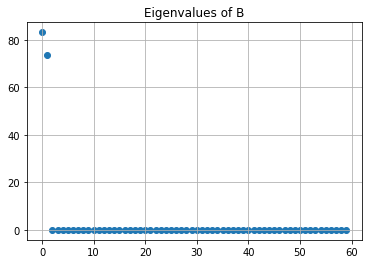

In [320]:
B = np.zeros((n,n))
origin = 0
for i in range(n):
    for j in range(i,n):
        B[i,j] = .5*(D[i,origin]**2 + D[j,origin]**2 - D[i,j]**2)
        B[j,i] = B[i,j]
B_eigvals = np.real(np.linalg.eigvals(B))
plt.scatter(range(n),B_eigvals);
plt.grid()
plt.title("Eigenvalues of B");

## Eigendecomposition of $B$

We are now going to compute the eigendecomposition of matrix $B$ :

\begin{align}
B &= Q \Lambda Q^T\\
&= Q \sqrt{\Lambda} \sqrt{\Lambda} Q^T\\
&= Q \sqrt{\Lambda} \sqrt{\Lambda}^T Q^T\\
&= (Q \sqrt{\Lambda}) (Q \sqrt{\Lambda})^T\\
&= YY^T
\end{align}

where $Y =  Q \sqrt{\Lambda}$

but if we want to reduce dimension to $d$, we can set $Y_d =  Q_d \sqrt{\Lambda_d}$ corresponding to the first $d$ rows of each matrix.

In [321]:
d = 2
eigvals, eigvecs = np.linalg.eig(B)
eigvals = np.round(np.abs(eigvals),10)
arg = np.argsort(-eigvals)
Lambda = np.diag(eigvals)
Q = np.real(eigvecs)
Y = np.dot( Q,np.sqrt(Lambda))[:,arg[:d]]
Y.shape

(60, 2)

## Reconstruction :

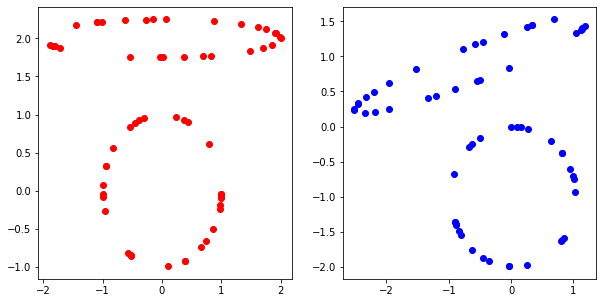

In [322]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c='r');
plt.subplot(122)
plt.scatter(Y[:,0],Y[:,1],c='b');

## Error of reconstruction (L-$\infty$ norm) :

In [323]:
DY = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        DY[i,j] = np.linalg.norm(Y[i]-Y[j],ord=2)
        DY[j,i] = DY[i,j]

np.linalg.norm(D-DY,ord=np.inf)

2.872441867696196e-11

## Dimensionality reduction :

We are now going to embed points from dimension $p$ to a space of dimension $d < p$.

We add a Z dimension to our original dataset $X$.

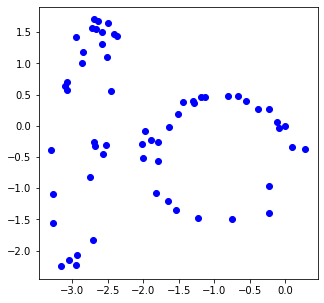

In [317]:
Zs = np.random.normal(0,.6,(len(X),1))
X3d = np.hstack((X,Zs))

d = 2


D3d = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        D3d[i,j] = np.linalg.norm(X3d[i]-X3d[j],ord=2)
        D3d[j,i] = D3d[i,j]
        
        
B3d = np.zeros((n,n))
origin = 0
for i in range(n):
    for j in range(i,n):
        B3d[i,j] = .5*(D3d[i,origin]**2 + D3d[j,origin]**2 - D3d[i,j]**2)
        B3d[j,i] = B3d[i,j]
        
        
eigvals, eigvecs = np.linalg.eig(B3d)
eigvals = np.round(np.abs(eigvals),10)
arg = np.argsort(-eigvals)
Lambda = np.diag(eigvals)
Q = np.real(eigvecs)
Y3d = np.dot( Q,np.sqrt(Lambda))[:,arg[:d]]


plt.figure(figsize=(5,5))
plt.scatter(Y3d[:,0],Y3d[:,1],c='b');

Embedding a 3d structure into a 2d space leads to representation errors.